In [1]:
!pip install git+https://github.com/ai-forever/diffusers.git
!pip install transformers
!pip install accelerate

  Cloning https://github.com/ai-forever/diffusers.git to /tmp/pip-req-build-sr6k8g4q
  Running command git clone --filter=blob:none --quiet https://github.com/ai-forever/diffusers.git /tmp/pip-req-build-sr6k8g4q
  Resolved https://github.com/ai-forever/diffusers.git to commit e7924e6874690d63c87878c3fea191780bea16a4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.19.0.dev0-py3-none-any.whl size=1251198 sha256=67dbed4cc40ace2e8f24b46f80e02f33f8be4ee1f329e1e20c5f5719adf54fec
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6c3po3p/wheels/1e/76/3d/f2637ece4e8ae3f6f07a4eee8c13505ce927d1aedd919fad64
Successfully built diffusers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 26.4 MB/s 

In [1]:
import sys
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
import PIL
import torch
from diffusers.utils import load_image
from torchvision import transforms
from transformers import CLIPVisionModelWithProjection
from diffusers.models import UNet2DConditionModel
import numpy as np

In [5]:
image_encoder = CLIPVisionModelWithProjection.from_pretrained('kandinsky-community/kandinsky-2-2-prior', subfolder='image_encoder').to(torch.float16).to('cuda')

In [6]:
unet = UNet2DConditionModel.from_pretrained('kandinsky-community/kandinsky-2-2-decoder', subfolder='unet').to(torch.float16).to('cuda')

In [7]:
prior = KandinskyV22PriorPipeline.from_pretrained('kandinsky-community/kandinsky-2-2-prior', image_encoder=image_encoder, torch_dtype=torch.float16)
prior = prior.to("cuda")

text_encoder/model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [8]:
decoder = KandinskyV22Pipeline.from_pretrained('kandinsky-community/kandinsky-2-2-decoder', unet=unet, torch_dtype=torch.float16)
decoder = decoder.to("cuda")

movq/diffusion_pytorch_model.safetensors not found


Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

In [9]:
negative_prior_prompt ='lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature'
torch.manual_seed(42)
img_emb = prior(prompt='A robot, 4k photo', num_inference_steps=25, num_images_per_prompt=1,)
negative_emb = prior(prompt=negative_prior_prompt, num_inference_steps=25, num_images_per_prompt=1)
images = decoder(image_embeds=img_emb.image_embeds, negative_image_embeds=negative_emb.image_embeds, num_inference_steps=50, height=512, width=512)


  0%|          | 0/25 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (112 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature']


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

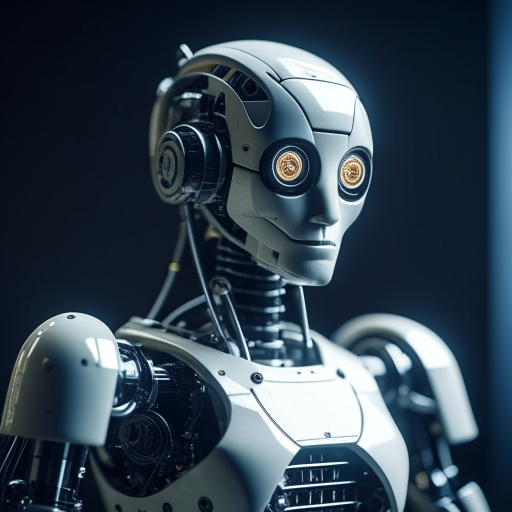

In [10]:
images.images[0]